In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
URL = 'https://anxerenergyapi-2rh6grnahq-ew.a.run.app/qf/demo'
END_POINT_RUL = 'predict_remaining_cycles_from_one_cycle'
END_POINT_SOH = 'predict_soh_from_one_cycle'

# Data preperation

#### REST API Input Explanation

### `time_steps` : list[float]
- Description: List of time intervals in seconds.
- Example: `[30.0, 60.01, 90.12]`
- Note: Time steps should be approximately 30 seconds.

### `voltage_steps` : list[float]
- Description: List of voltage values corresponding to the specified time steps.
- Example: `[3.8, 4.0, 4.2]`
- Note: For Constant Current (CC) charging, expect voltage to rise up to 4.2V.

### `current_steps` : list[float]
- Description: List of current values corresponding to the specified time steps.
- Example: `[1.0, 1.0, 0.0]`
- Note: Current values for charging and discharging.

### `charging_stage` : list[float]
- Description: List containing values indicating the charging stage.
    - `-1`: Discharge
    - `0`: Charging with constant voltage
    - `1`: Charging with constant current
- Example: `[1, 0, -1]`
- Note: Expect voltage range between 4.2V to 2.75V for discharge.

### Additional Notes:
- The model is trained on a battery type LCO.
- The battery is cycled at a constant current of 1C.
- For Constant Current (CC) charging, expect the voltage to approximately rise up to 4.2V.
- For discharge, expect the voltage range between 4.2V to 2.75V.


In [3]:
!wget https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo1.csv
!wget https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo2.csv
!wget https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo3.csv


--2023-11-14 15:08:20--  https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 21145 (21K) [text/plain]
Saving to: ‘demo1.csv’

demo1.csv           100%[===================>]  20,65K  --.-KB/s    in 0,001s  

2023-11-14 15:08:20 (13,9 MB/s) - ‘demo1.csv’ saved [21145/21145]



--2023-11-14 15:08:21--  https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: 18762 (18K) [text/plain]
Saving to: ‘demo2.csv’

demo2.csv           100%[===================>]  18,32K  --.-KB/s    in 0,002s  

2023-11-14 15:08:21 (10,6 MB/s) - ‘demo2.csv’ saved [18762/18762]



--2023-11-14 15:08:22--  https://raw.githubusercontent.com/krishnakantsingh14/AnxerApiPublic/main/demo3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.


HTTP request sent, awaiting response... 

200 OK
Length: 17952 (18K) [text/plain]
Saving to: ‘demo3.csv’

demo3.csv           100%[===================>]  17,53K  --.-KB/s    in 0,003s  

2023-11-14 15:08:22 (6,15 MB/s) - ‘demo3.csv’ saved [17952/17952]



In [4]:
df[::2]

NameError: name 'df' is not defined

In [ ]:
df_ = pd.read_csv('demo1.csv')
for i in range(2,100,5):
    df = df_.drop(np.random.randint(1,300, i))
    df = df[::2]
    print('='*30, i, '='*30)
    input_dict = {
    'time_steps': df['Test_Time(s)'].values.tolist(),
    'voltage_steps': df['Voltage(V)'].values.tolist(),
    'current_steps': df['Current(A)'].values.tolist(),
    'charging_stage': df['charging_stage'].values.tolist(),
    # 'internal_resistance': [0.1]
    }
    r = requests.post(f'{URL}/{END_POINT_RUL}', json=input_dict)
    print('Remaining useful cycles:', int(r.json()['cycles']))
    r = requests.post(f'{URL}/{END_POINT_SOH}', json=input_dict)
    soh = r.json()['SOH']
    print(f'State of Health: {int(soh*100)} %')

============================== 2 ==============================
Remaining useful cycles: 596
State of Health: 98 %
============================== 7 ==============================
Remaining useful cycles: 596
State of Health: 98 %
============================== 12 ==============================
Remaining useful cycles: 596
State of Health: 98 %
============================== 17 ==============================
Remaining useful cycles: 596
State of Health: 98 %
============================== 22 ==============================
Remaining useful cycles: 592
State of Health: 99 %
============================== 27 ==============================
Remaining useful cycles: 592
State of Health: 99 %
============================== 32 ==============================
Remaining useful cycles: 592
State of Health: 99 %
============================== 37 ==============================
Remaining useful cycles: 592
State of Health: 98 %
============================== 42 ==============================
Remaining

In [ ]:
df[::5]

,Voltage(V),Current(A),Test_Time(s),charging_stage
0,3.627381,0.550319,150.093287,1
5,3.752232,0.550138,300.169694,1
11,3.794173,0.550138,480.260304,1
16,3.799031,0.549958,630.336562,1
23,3.811338,0.550138,840.442511,1
...,...,...,...,...
342,3.499454,-1.099536,12390.711885,-1
347,3.472087,-1.099536,12540.787770,-1
352,3.430146,-1.099536,12690.863698,-1
357,3.323269,-1.099716,12840.939581,-1


In [ ]:
r = requests.post(f'{URL}/{END_POINT_SOH}', json=input_dict)
soh = r.json()['SOH']
print(f'State of Health: {int(soh*100)} %')

State of Health: 99 %


Text(0, 0.5, 'Voltage(V)')

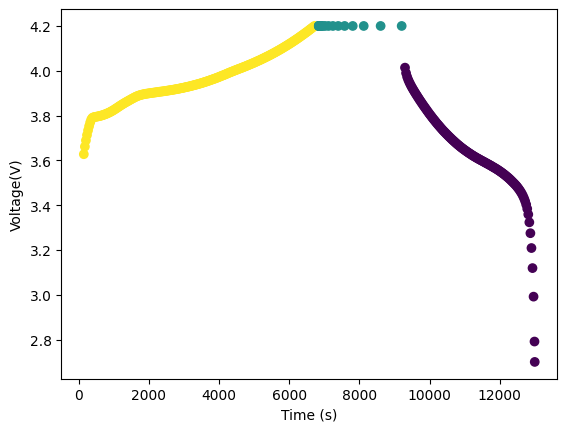

In [ ]:
plt.scatter(df['Test_Time(s)'], df['Voltage(V)'], c= df['charging_stage']);
plt.xlabel('Time (s)')
plt.ylabel('Voltage(V)')

In [ ]:
# input_dict